In [ ]:
!pip install kaggle

**Data Collection**

In [ ]:
from google.colab import files
files.upload()  # Manually upload the kaggle.json file here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"madhaviitbhu","key":"4e3d92f3178549176bcdeda3dfeb315d"}'}

In [ ]:
import os

# Move kaggle.json to the correct directory
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
os.chmod('/root/.kaggle/kaggle.json', 600)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")

print("Path to dataset files:", path)

100%|██████████| 242M/242M [00:02<00:00, 101MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/snap/amazon-fine-food-reviews/versions/2


**Importing Libraries**

In [ ]:
!pip install tensorflow tensorflow-text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.2 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [ ]:
import string
import re #to work with regular expressions

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.utils import to_categorical # Updated import path
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pickle

In [ ]:
# Base path to your dataset
dataset_path = "/root/.cache/kagglehub/datasets/snap/amazon-fine-food-reviews/versions/2"

# List all files and folders in the dataset directory
for root, dirs, files in os.walk(dataset_path):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")
    print("-" * 50)

Directory: /root/.cache/kagglehub/datasets/snap/amazon-fine-food-reviews/versions/2
Subdirectories: []
Files: ['hashes.txt', 'Reviews.csv', 'database.sqlite']
--------------------------------------------------


**Data Preparation**

In [ ]:
# File path to the CSV file
file_path = '/root/.cache/kagglehub/datasets/snap/amazon-fine-food-reviews/versions/2/Reviews.csv'
data = pd.read_csv(file_path)
print(data.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [ ]:
data.shape

(568454, 10)

In [ ]:
# Check if there are any null values
print(data.isnull().values.any())

True


In [ ]:
print(data.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [ ]:
# Display rows with null values
null_rows = data[data.isnull().any(axis=1)]
print(null_rows)

            Id   ProductId          UserId                     ProfileName  \
10616    10617  B002DHN956  A1LSYR30XW7CFT                             NaN   
25509    25510  B000LKZB4Y  A36BVYD0NT7Z0F                             NaN   
33958    33959  B00412W76S  A3TJPSWY2HE4BS  S. Layton "homeschool blogger"   
38874    38875  B000AYDGZ2  A36BVYD0NT7Z0F                             NaN   
40548    40549  B00020HHRW  A3TJPSWY2HE4BS  S. Layton "homeschool blogger"   
47923    47924  B004SRH2B6  A2DEHJJIEAPPBF                             NaN   
49800    49801  B000CRHQN0  A2LYFY32LXQDON                             NaN   
67077    67078  B0006348H2  A2P0P67Y55SNOX                             NaN   
101106  101107  B0014B0HWK  A3TJPSWY2HE4BS  S. Layton "homeschool blogger"   
102979  102980  B000FVDWU4  A3TJPSWY2HE4BS  S. Layton "homeschool blogger"   
106550  106551  B001EQ5DG0  A1P500QXEG3IUZ                             NaN   
117515  117516  B0016B7Z32  A3TJPSWY2HE4BS  S. Layton "homeschoo

In [ ]:
total_rows=data.shape[0]
data.dropna(how='any',inplace=True)
remaining_rows=data.shape[0]
print("Total rows:",total_rows)
print("Remaining rows:",remaining_rows)

removed_rows=total_rows-remaining_rows
print("Removed rows:",removed_rows)

Total rows: 568454
Remaining rows: 568401
Removed rows: 53


In [ ]:
print(f"\nPercentage of data removed:{np.round((removed_rows/total_rows)*100,2)}%")
print(f"Percentage of data remaining:{np.round((remaining_rows/total_rows)*100,2)}%")



Percentage of data removed:0.01%
Percentage of data remaining:99.99%


In [ ]:
# Check if there are any duplicate rows
print(data.duplicated().any())

# Count the number of duplicate rows
print(data.duplicated().sum())

# Display all duplicate rows
duplicates = data[data.duplicated()]
print(duplicates)

False
0
Empty DataFrame
Columns: [Id, ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary, Text]
Index: []


Since no rows were identical across all columns, the output was False and 0 duplicates.

In [ ]:
# Unique values in the 'Text' column
unique_texts = data['Text'].nunique()
print(f"The 'Text' column has {unique_texts} unique values out of {total_rows} rows.")

# Rows with duplicate 'Text'
duplicate_texts = data[data['Text'].duplicated(keep=False)]
print(f"There are {len(duplicate_texts)} rows with duplicate 'Text'.")

The 'Text' column has 393560 unique values out of 568454 rows.
There are 232876 rows with duplicate 'Text'.


In [ ]:
# Total rows in the dataset
total_rows = data.shape[0]

# Loop through each column to calculate unique and duplicate values
for column in data.columns:
    unique_values = data[column].nunique()  # Number of unique values
    duplicate_rows = data[data[column].duplicated(keep=False)]  # Rows with duplicate values
    print(f"Column '{column}':")
    print(f"  - Unique values: {unique_values}")
    print(f"  - Duplicate rows: {len(duplicate_rows)} out of {total_rows}")
    print()

Column 'Id':
  - Unique values: 568401
  - Duplicate rows: 0 out of 568401

Column 'ProductId':
  - Unique values: 74257
  - Duplicate rows: 537994 out of 568401

Column 'UserId':
  - Unique values: 256042
  - Duplicate rows: 393021 out of 568401

Column 'ProfileName':
  - Unique values: 218412
  - Duplicate rows: 426181 out of 568401

Column 'HelpfulnessNumerator':
  - Unique values: 231
  - Duplicate rows: 568337 out of 568401

Column 'HelpfulnessDenominator':
  - Unique values: 234
  - Duplicate rows: 568346 out of 568401

Column 'Score':
  - Unique values: 5
  - Duplicate rows: 568401 out of 568401

Column 'Time':
  - Unique values: 3168
  - Duplicate rows: 568177 out of 568401

Column 'Summary':
  - Unique values: 295734
  - Duplicate rows: 332224 out of 568401

Column 'Text':
  - Unique values: 393560
  - Duplicate rows: 232876 out of 568401



**Data Cleaning**

In [ ]:
# Total rows in the dataset
total_rows = data.shape[0]

# Initialize an empty list to store results
duplicate_analysis = []

# Loop through each column to calculate percentage of duplicates
for column in data.columns:
    unique_values = data[column].nunique()  # Number of unique values
    duplicate_count = data[column].duplicated().sum()  # Count of duplicate rows
    duplicate_percentage = (duplicate_count / total_rows) * 100  # Percentage of duplicates

    # Append results to the list
    duplicate_analysis.append({
        'Column': column,
        'Unique Values': unique_values,
        'Duplicate Values': duplicate_count,
        'Duplicate Percentage (%)': round(duplicate_percentage, 2)
    })

# Convert the list of results into a DataFrame
duplicate_df = pd.DataFrame(duplicate_analysis)

# Display the DataFrame
print(duplicate_df)

                   Column  Unique Values  Duplicate Values  \
0                      Id         568401                 0   
1               ProductId          74257            494144   
2                  UserId         256042            312359   
3             ProfileName         218412            349989   
4    HelpfulnessNumerator            231            568170   
5  HelpfulnessDenominator            234            568167   
6                   Score              5            568396   
7                    Time           3168            565233   
8                 Summary         295734            272667   
9                    Text         393560            174841   

   Duplicate Percentage (%)  
0                      0.00  
1                     86.94  
2                     54.95  
3                     61.57  
4                     99.96  
5                     99.96  
6                    100.00  
7                     99.44  
8                     47.97  
9                

In [ ]:
#drop duplicates
a =  data.shape[0]
data.drop_duplicates(inplace=True, subset=['Score','Text'])
b = data.shape[0]

print("No. of rows removed :", a-b)

print(f"\nPercentage of data removed: {np.round(((a-b)/total_rows)*100,2)}%")
print(f"Percentage of data remaining: {np.round((b/total_rows)*100,2)}%")

No. of rows removed : 174745

Percentage of data removed: 30.74%
Percentage of data remaining: 69.26%


In [ ]:
a =  data.shape[0]

idx = data[data["HelpfulnessNumerator"]>data["HelpfulnessDenominator"]].index
data.drop(index=idx, inplace=True)

b = data.shape[0]

print("No. of rows removed :", a-b)

print(f"\nPercentage of data removed:{np.round(((a-b)/total_rows)*100,2)}%")
print(f"Percentage of data remaining:{np.round((b/total_rows)*100,2)}%")

No. of rows removed : 2

Percentage of data removed:0.0%
Percentage of data remaining:69.26%


In [ ]:
#`Score` > 3 : "Positive"
# `Score` == 3 : "Neutral"
# `Score` < 3 : "Negative"

def create_target(x):

    return "Positive" if x>3 else "Negative" if x<3 else "Neutral"

data.loc[:, 'target'] = data.Score.apply(create_target)

In [ ]:
# target column
data[['Score', 'target']].sample(5)

,Score,target
109431,5,Positive
232125,5,Positive
516189,5,Positive
219954,5,Positive
49859,5,Positive


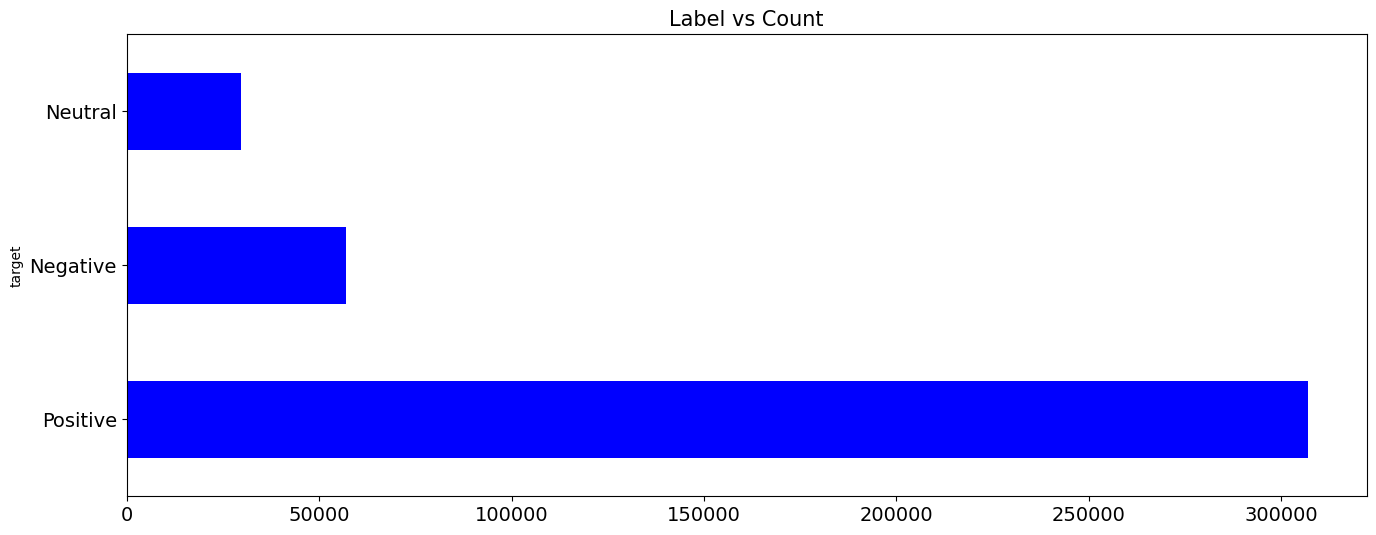

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

vc = data.target.value_counts()
vc.plot.barh(color="blue",fontsize=14,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()

In [ ]:
neutral = data.loc[data.target=="Neutral"] # 29770 reviews

positive = data.loc[data.target=="Positive"].sample(50000)

negative = data.loc[data.target=="Negative"].sample(50000)

data = pd.concat([positive, negative, neutral])
data.shape

(129770, 11)

target
Positive    50000
Negative    50000
Neutral     29770
Name: count, dtype: int64


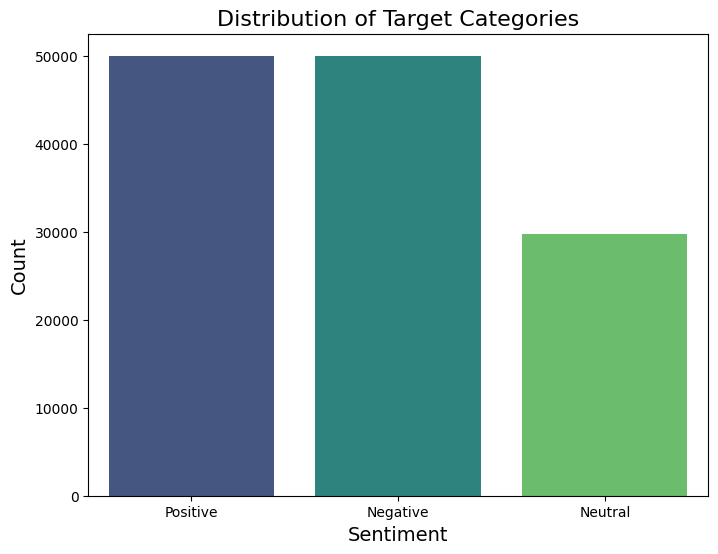

In [ ]:
# Display count of each target category
target_counts = data['target'].value_counts()

# Print the counts
print(target_counts)

# Optional: Visualize the counts with a bar plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.title("Distribution of Target Categories", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

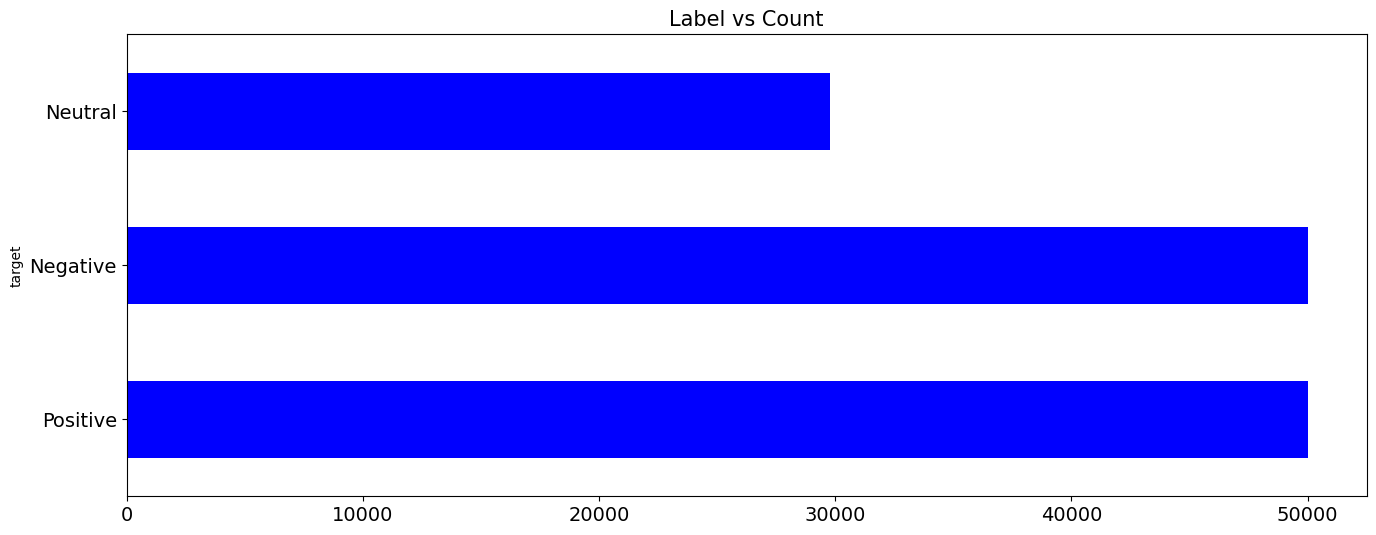

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

vc = data.target.value_counts()
vc.plot.barh(color="blue",fontsize=14,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()

**Data Pre-processing**

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# stopwords
total_stopwords = set(stopwords.words('english'))

# subtract negative stop words like no, not, don't etc.. from total_stopwords
negative_stop_words = set(word for word in total_stopwords
                          if "n't" in word or 'no' in word)

final_stopwords = total_stopwords - negative_stop_words

#
final_stopwords.add("one")
print(final_stopwords)


{'i', "you've", 'who', 'through', 's', 'doing', 'at', 'it', 'each', 'from', 'the', 'will', 'you', 'your', 'before', 'been', 'here', 'o', 'then', 'against', 'below', 'if', 'only', 'my', 'we', 'where', 'why', 'ourselves', 'in', 'me', "it's", 'this', 'on', 'its', 'being', 'him', 'ma', 'should', 'mustn', 'won', 'yourselves', 'ain', "you'll", 'an', 'so', 'is', 'mightn', 'to', 'above', 'her', 'than', 'again', 'them', 'with', 'can', 'while', 'all', 'aren', 'more', 'they', 'very', 'their', 'few', 'don', 'those', 'for', 'some', 'there', 'haven', 'or', 'how', 'whom', 'between', 'shan', 'during', 'were', 'was', 'wouldn', 'one', 'themselves', 'll', 'same', 'isn', 'yours', 'a', 'has', "you're", 'didn', 'that', 'm', 'out', 'she', 'until', 'am', 'by', 'hasn', 'theirs', 'own', "that'll", 'did', 'too', 'myself', 'most', 'which', 'other', 'shouldn', 'he', 'does', "she's", 'but', 'itself', 'y', 'about', 'up', 'his', 'wasn', 'doesn', 'weren', 'under', 'down', 've', 'both', 'hers', 'once', 'when', 'himself

In [ ]:
#stemming object
stemmer = PorterStemmer()

# ---------------------------------------------
HTMLTAGS = re.compile('<.*?>')
table = str.maketrans(dict.fromkeys(string.punctuation))
remove_digits = str.maketrans('', '', string.digits)
MULTIPLE_WHITESPACE = re.compile(r"\s+")

def preprocessor(review):
    # remove html tags
    review = HTMLTAGS.sub(r'', review)

    # remove puncutuation
    review = review.translate(table)

    # remove digits
    review = review.translate(remove_digits)

    # lower case all letters
    review = review.lower()

    # replace multiple white spaces with single space
    review = MULTIPLE_WHITESPACE.sub(" ", review).strip()

    # remove stop words
    review = [word for word in review.split()
              if word not in final_stopwords]

    # stemming
    review = ' '.join([stemmer.stem(word) for word in review])

    return review

In [ ]:
print("Before preprocessing : ")
data.Text.iloc[6]

Before preprocessing : 


'We first found this item in Cancun Mexico and thought we would never find it again. But I forgot you could find everything on AMAZON.<br />Every day use...eggs.'

In [ ]:
# apply preprocessing function

data.Text = data.Text.apply(preprocessor)
print("After preprocessing : ")
data.Text.iloc[6]

After preprocessing : 


'first found item cancun mexico thought would never find forgot could find everyth amazoneveri day useegg'

**Word Cloud**

In [ ]:
def generate_wcloud(text):
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(stopwords=stopwords, background_color='white')
    wordcloud.generate(text)

    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()

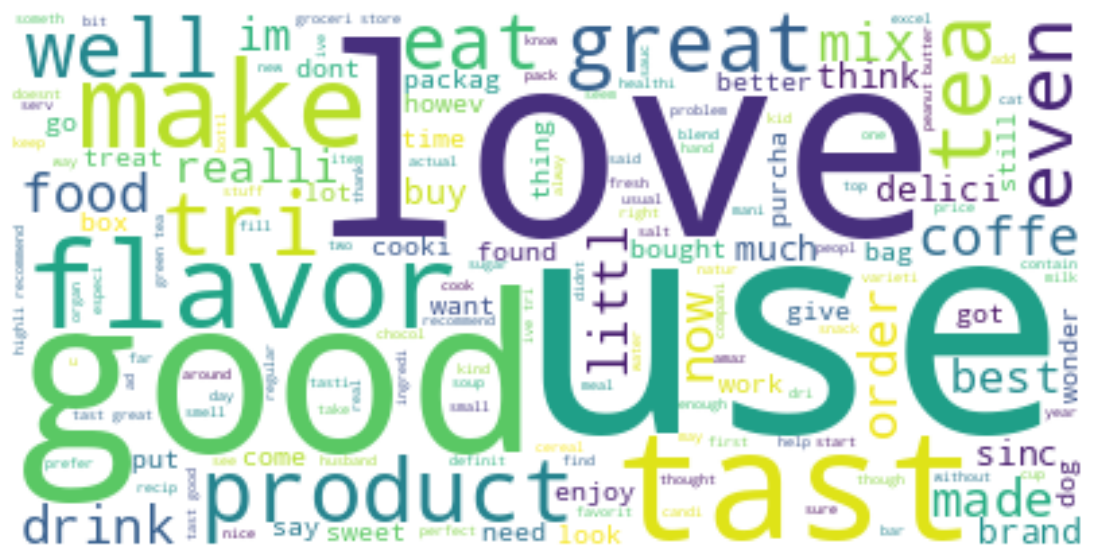

In [ ]:
pos = data.loc[data.target=="Positive"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

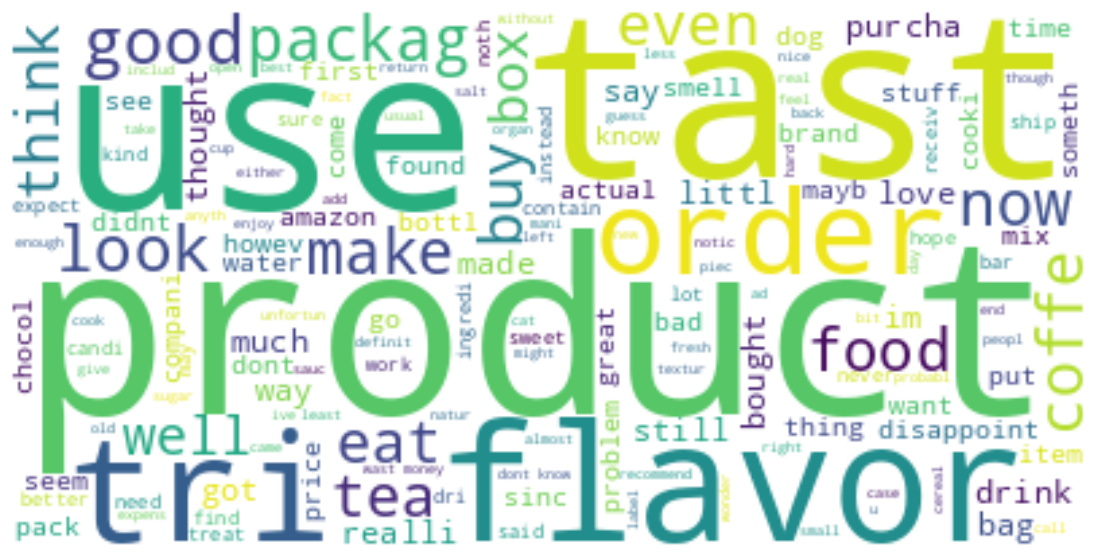

In [ ]:
pos = data.loc[data.target=="Negative"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

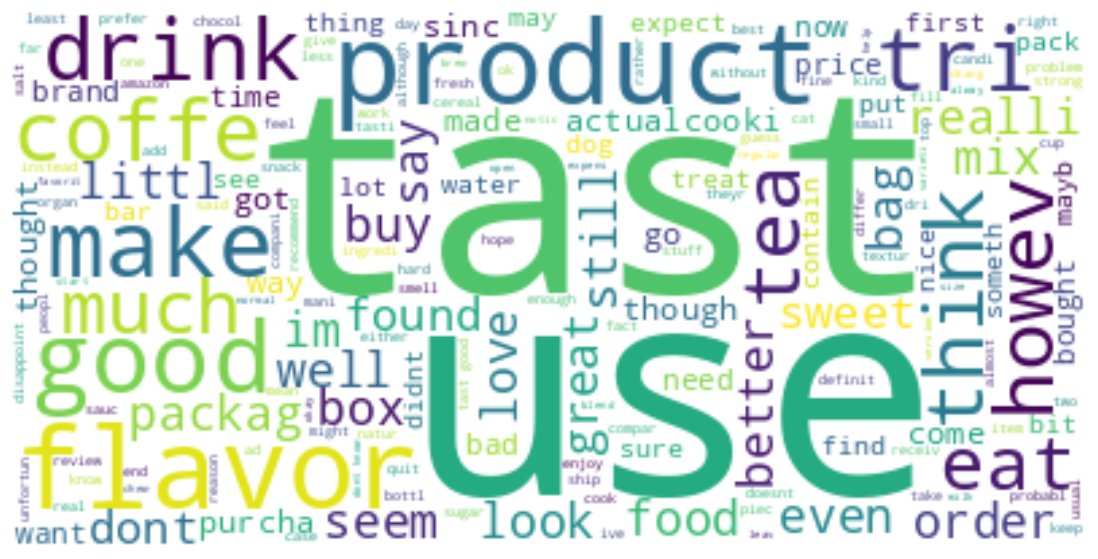

In [ ]:
pos = data.loc[data.target=="Neutral"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

**Train Test Split**

In [ ]:
X = data.Text
y = data.target

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.20, random_state=1, stratify=y)

In [ ]:
X_train.shape, X_test.shape


((103816,), (25954,))

**Vectorization**

BoW- identifies unique words in the dataset to form the vocabulary - represent each text as a vector elements which corresponds to the frequency of word in the document. Doesnt take into consideration the order of the words

In [ ]:
#converting texts to numerical features
bow_vectorizer = CountVectorizer(max_features=10000)
bow_vectorizer.fit(X_train)

# transform
bow_X_train = bow_vectorizer.transform(X_train)
bow_X_test = bow_vectorizer.transform(X_test)

Tf-Idf: It enhances the BoW by giving more weights to the rare words and less to common ones.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(X_train)

# transform
tfidf_X_train = tfidf_vectorizer.transform(X_train)
tfidf_X_test = tfidf_vectorizer.transform(X_test)

Label Encoder- converts categorical labels into numeric format

In [ ]:
labelEncoder = LabelEncoder()

y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

labels = labelEncoder.classes_.tolist()
print(labels)

['Negative', 'Neutral', 'Positive']


**Model Training**

In [ ]:
###
def train_and_eval(model, trainX, trainY, testX, testY):

    # training
    _ = model.fit(trainX, trainY)

    # predictions
    y_preds_train = model.predict(trainX)
    y_preds_test = model.predict(testX)

    # evaluation
    print()
    print(model)
    print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
    print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")
    print('\n',40*'-')

Logistic Regresion- when features are correlated

In [ ]:
# Hyperparameters
C = [0.001, 0.01, 0.1, 1, 10]

for c in C:
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)

    # Train and evaluate model
    train_and_eval(model=log_model,
                   trainX=bow_X_train,
                   trainY=y_train,
                   testX=bow_X_test,
                   testY=y_test)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score : 0.7000173383678816
Test accuracy score : 0.6939200123295061

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score : 0.7379402018956616
Test accuracy score : 0.7168837173460738

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score : 0.7662691685289358
Test accuracy score : 0.7172690144101102

 ----------------------------------------

LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score : 0.7865165292440471
Test accuracy score : 0.7041303845264699

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.7918914232873545
Test accuracy score : 0.6927255914309933

 ----------------------------------------


In [ ]:
alphas = [0, 0.2, 0.6, 0.8, 1]

for a  in alphas:
    # Define model
    nb_model = MultinomialNB(alpha=a)

    # Train and evaluate model
    train_and_eval(model=nb_model,
                   trainX=bow_X_train,
                   trainY=y_train,
                   testX=bow_X_test,
                   testY=y_test)



MultinomialNB(alpha=0)
Train accuracy score : 0.7108441858673037
Test accuracy score : 0.6852122986822841

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.7100446944594282
Test accuracy score : 0.6872929028280804

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.7096593973953919
Test accuracy score : 0.6879479078369423

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.7094282191569701
Test accuracy score : 0.6880634969561532

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.7093318948909609
Test accuracy score : 0.6882176157817678

 ----------------------------------------


In [ ]:
# Hyperparameters
C = [0.001, 0.01, 0.1, 1, 10]

for c in C:
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)

    # Train and evaluate model
    train_and_eval(model=log_model,
                   trainX=tfidf_X_train,
                   trainY=y_train,
                   testX=tfidf_X_test,
                   testY=y_test)



LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score : 0.6446886799722586
Test accuracy score : 0.6433690375279341

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score : 0.6778242274793866
Test accuracy score : 0.6752716344301456

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score : 0.7304076442937505
Test accuracy score : 0.7166910688140556

 ----------------------------------------

LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score : 0.763697310626493
Test accuracy score : 0.723664945673114

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.7859867457809971
Test accuracy score : 0.7080604145796409

 ----------------------------------------


In [ ]:
alphas = [0, 0.2, 0.6, 0.8, 1]

for a  in alphas:
    # Define model
    nb_model = MultinomialNB(alpha=a)

    # Train and evaluate model
    train_and_eval(model=nb_model,
                   trainX=tfidf_X_train,
                   trainY=y_train,
                   testX=tfidf_X_test,
                   testY=y_test)


MultinomialNB(alpha=0)
Train accuracy score : 0.7157856207135702
Test accuracy score : 0.6858673036911459

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.7140806812052092
Test accuracy score : 0.6893735069738769

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.7112198505047391
Test accuracy score : 0.6906449872851969

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.7096593973953919
Test accuracy score : 0.6896046852122987

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.7084071819372736
Test accuracy score : 0.6896432149187023

 ----------------------------------------


**Model Evaluation**

In [ ]:
def plot_cm(y_true, y_pred):
    plt.figure(figsize=(6,6))

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    sns.heatmap(
        cm, annot=True, cmap='Blues', cbar=False, fmt='.2f',
        xticklabels=labels, yticklabels=labels)

    return plt.show()


In [ ]:
bmodel = LogisticRegression(C=1, max_iter=500, random_state=1)
bmodel.fit(tfidf_X_train, y_train)

LogisticRegression(C=1, max_iter=500, random_state=1)

In [ ]:
# predictions
y_preds_train = bmodel.predict(tfidf_X_train)
y_preds_test = bmodel.predict(tfidf_X_test)

In [ ]:
print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")

Train accuracy score : 0.763697310626493
Test accuracy score : 0.723664945673114


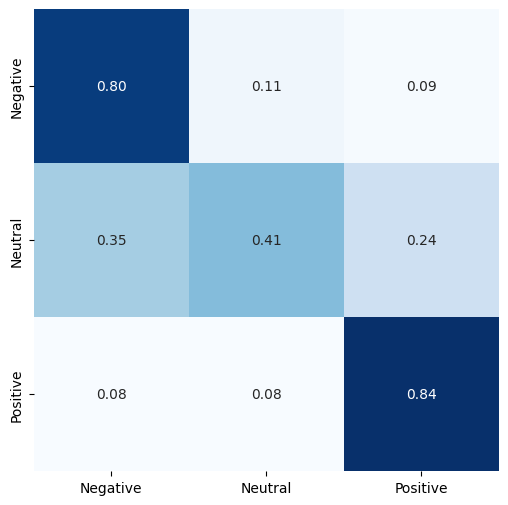

In [ ]:
plot_cm(y_test, y_preds_test)

**Deployment and Testing**

In [ ]:
with open("transformer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

with open("model.pkl", "wb") as f:
    pickle.dump(bmodel, f)

In [ ]:
# labels = ['Negative', 'Neutral', 'Positive']
def get_sentiment(review):
    # preprocessing
    x = preprocessor(review)
    #vectorization
    x = tfidf_vectorizer.transform([x])
    #prediction
    y = int(bmodel.predict(x.reshape(1,-1)))
    return labels[y]


In [ ]:
# positve review
review = "This chips packet is very tasty. I highly recommend this!"
print(f"This is a {get_sentiment(review)} review!")

# negative review
review = "This product is a waste of money. Don't buy this!!"
print(f"This is a {get_sentiment(review)} review!")

This is a Positive review!
This is a Negative review!
